In [ ]:
# importing libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [ ]:
# Loading dataset
df = pd.read_csv("house_prices.csv").drop_duplicates()

In [ ]:
# reading dataset
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [ ]:
print("\nShape: ", df.shape)


Shape:  (187531, 21)


## **Data Cleaning and Preprocessing**

In [ ]:
df.duplicated().sum()

0

In [ ]:
house_df = df.copy()
house_df.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [ ]:
# We are dropping columns with a high number of missing values
house_df.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)
house_df.isnull().sum()

Index                    0
Title                    0
Description           3023
Amount(in rupees)        0
Price (in rupees)    17665
location                 0
Carpet Area          80673
Status                 615
Floor                 7077
Transaction             83
Furnishing            2897
facing               70233
overlooking          81436
Bathroom               828
Balcony              48935
Ownership            65517
dtype: int64

In [ ]:
house_df.drop(columns=['Index'],inplace=True)

In [ ]:
# 1. Fill null values in texual cols with 'Unknown'
cols_to_fill = ['Description', 'facing', 'overlooking', 'Ownership']
house_df[cols_to_fill] = house_df[cols_to_fill].fillna('Unknown')

# 2. Fill null values in 'Price (in rupees)' with mean value
mean_price = house_df['Price (in rupees)'].mean()
house_df['Price (in rupees)'].fillna(mean_price, inplace=True)

# 3. Replace null values in numeric columns with mode
cols_to_fill_mode = ['Status', 'Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house_df[col].mode().iloc[0]
    house_df[col].fillna(mode_val, inplace=True)

# 4. Convert 'Bathroom' and 'Balcony' columns to numeric form
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# Fill NaN values in 'Bathroom' and 'Balcony' with the mean of their respective columns
mean_bathroom = house_df['Bathroom'].mean()
mean_balcony = house_df['Balcony'].mean()
house_df['Bathroom'].fillna(mean_bathroom, inplace=True)
house_df['Balcony'].fillna(mean_balcony, inplace=True)

# Convert >10 values in 'Bathroom' and 'Balcony' to their respective numeric forms
house_df.loc[house_df['Bathroom'] == '>10', 'Bathroom'] = 11
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

house_df.loc[house_df['Balcony'] == '>10', 'Balcony'] = 11
house_df['Balcony'] = house_df['Balcony'].astype(int)

In [ ]:
# 5. Convert Carpet Area to sqft numeric
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area = float(area.replace(' sqft', ''))
            else:
                area = float(area.replace(' sqm', '')) * 10.7639  # Convert square meters to square feet
            return area
    except ValueError:
        return np.nan

house_df['Carpet Area'] = house_df['Carpet Area'].apply(convert_to_sqft)

# Impute missing values in 'Carpet Area' with mean
mean_carpet_area = house_df['Carpet Area'].mean()
house_df['Carpet Area'].fillna(mean_carpet_area, inplace=True)

# 6. Impute missing values in 'Floor' with mode
mode_floor = house_df['Floor'].mode().iloc[0]
house_df['Floor'].fillna(mode_floor, inplace=True)

# Checking if null values still exist
print(house_df.isnull().sum())

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64


In [ ]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


In [ ]:
house_df.duplicated().sum()

119348

In [ ]:
house_df.drop_duplicates(inplace=True)

In [ ]:
house_df.shape

(68183, 15)

In [ ]:
# Convert 'Amount(in rupees)' to numerical format
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000
        else:
            return float(amount)
    except ValueError:
        return None

house_df['Amount(in rupees)'] = house_df['Amount(in rupees)'].apply(convert_amount)

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68183 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68183 non-null  object 
 1   Description        68183 non-null  object 
 2   Amount(in rupees)  65248 non-null  float64
 3   Price (in rupees)  68183 non-null  float64
 4   location           68183 non-null  object 
 5   Carpet Area        68183 non-null  float64
 6   Status             68183 non-null  object 
 7   Floor              68183 non-null  object 
 8   Transaction        68183 non-null  object 
 9   Furnishing         68183 non-null  object 
 10  facing             68183 non-null  object 
 11  overlooking        68183 non-null  object 
 12  Bathroom           68183 non-null  int64  
 13  Balcony            68183 non-null  int64  
 14  Ownership          68183 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.3+ MB


In [ ]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1,1,Unknown
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,2,Co-operative Society


## **Handling Outliers**

In [ ]:
out_df = house_df.copy()

In [ ]:
out_df.describe()
#detecting values that are significantly different from the mean and quartiles

,Amount(in rupees),Price (in rupees),Carpet Area,Bathroom,Balcony
count,6.524800e+04,6.818300e+04,68183.000000,68183.000000,68183.000000
mean,1.067952e+07,6.873848e+03,1283.153494,2.404030,2.060352
std,6.292855e+07,4.258265e+04,3741.373385,0.877477,0.854484
min,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000
25%,4.100000e+06,3.957000e+03,1030.000000,2.000000,2.000000
50%,6.500000e+06,5.357000e+03,1267.967442,2.000000,2.000000
75%,1.090000e+07,7.583772e+03,1267.967442,3.000000,2.000000
max,1.400300e+10,6.700000e+06,709222.000000,10.000000,10.000000


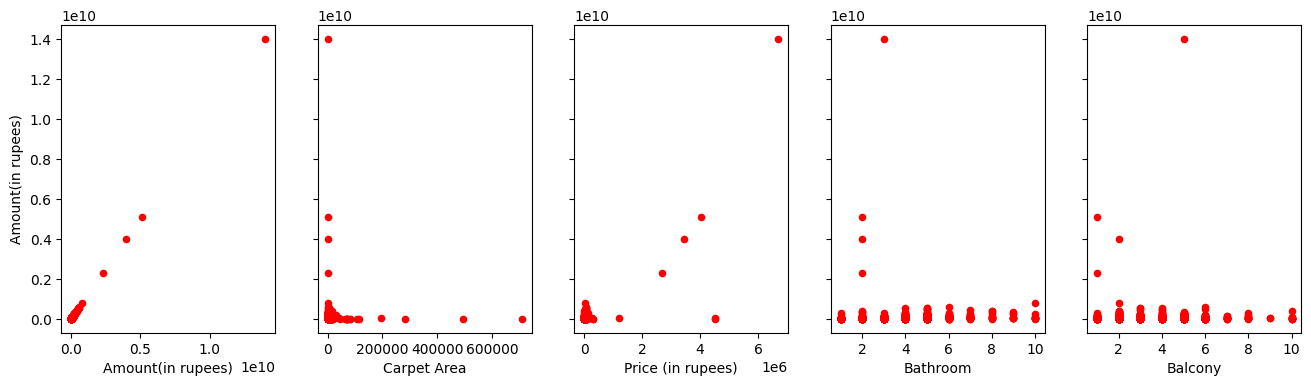

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['Amount(in rupees)','Carpet Area','Price (in rupees)','Bathroom','Balcony']
for i, c in zip(range(5), col_name):
    out_df.plot.scatter(ax=axes[i], x=c, y='Amount(in rupees)', sharey=True, colorbar=False, c='r')

In [ ]:
# the function to replace outliers with nan
def replace_outliers_with_nan_iqr(out_df, feature, inplace=False):
    desired_feature = out_df[feature]

    Q1, Q3 = desired_feature.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [ ]:
features_with_outlier = ['Amount(in rupees)','Carpet Area','Price (in rupees)','Bathroom','Balcony']
features_means = out_df[features_with_outlier].mean()
# iterate through features with outliers
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(out_df, i, inplace=True)

# replace np.nan by the mean values
out_df.fillna(features_means, inplace=True)
out_df.isnull().sum()

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64

## **EDA**

In [ ]:
ok_df = out_df.copy()

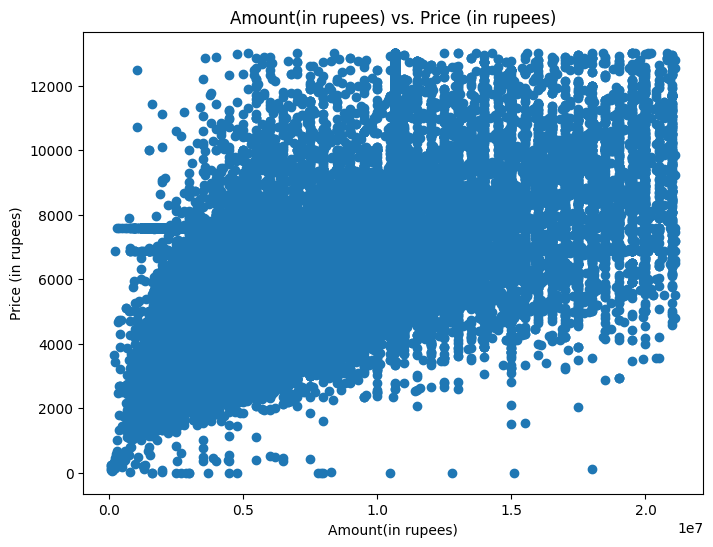

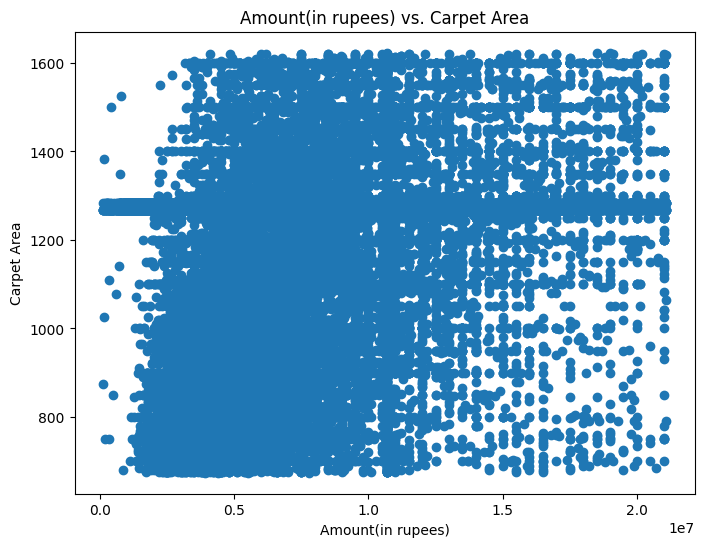

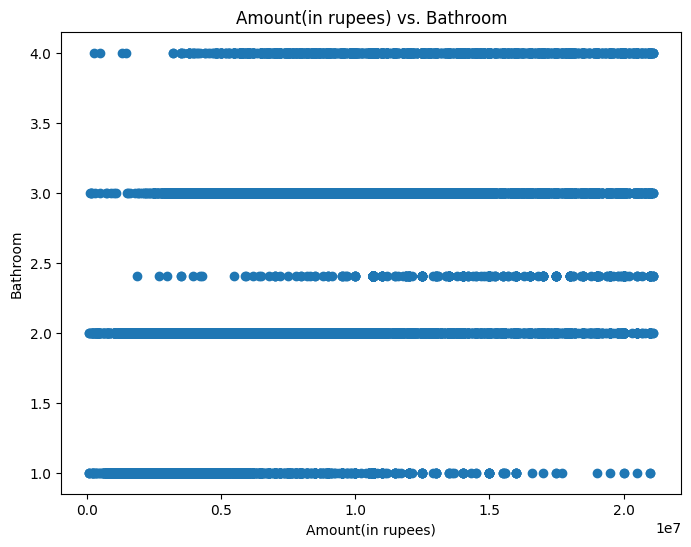

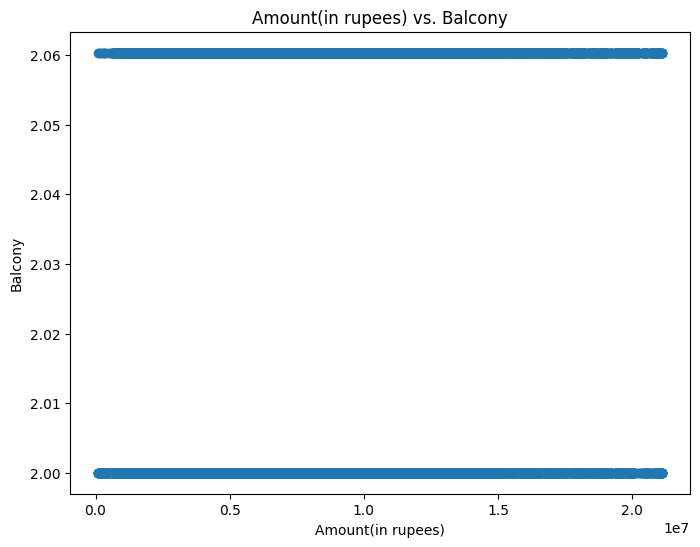

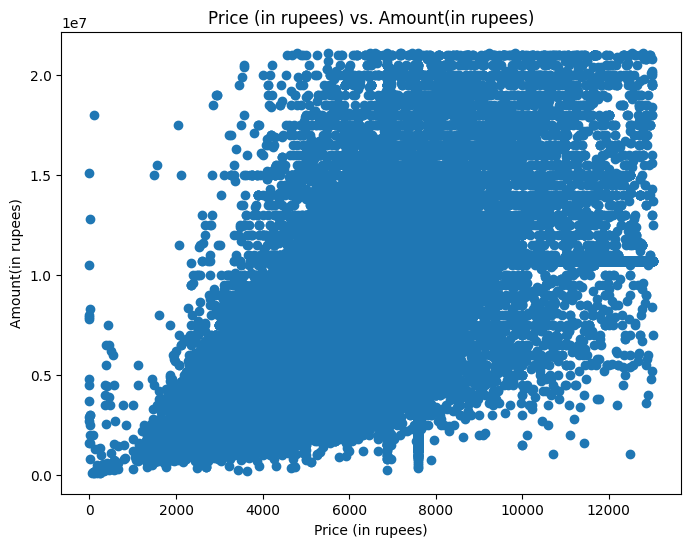

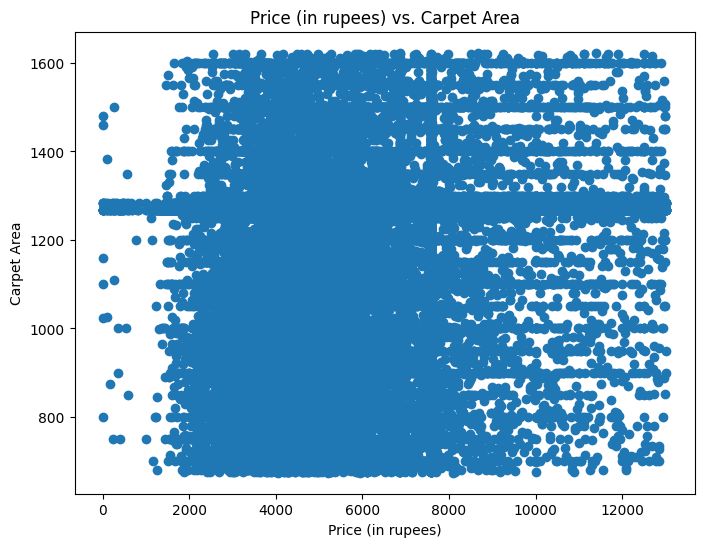

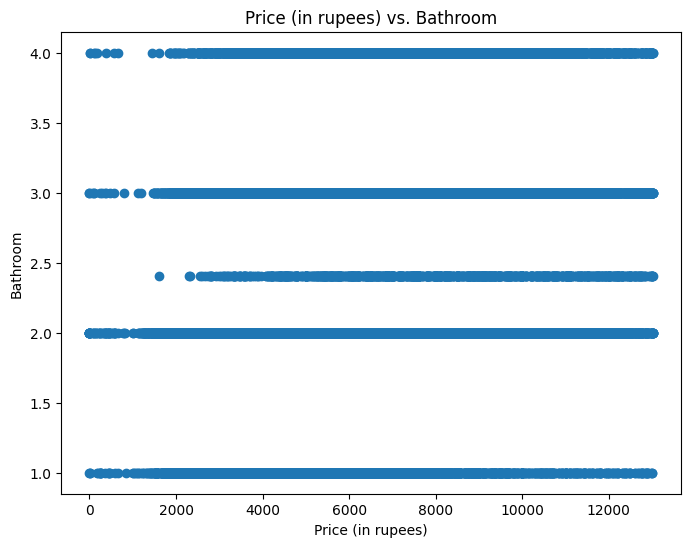

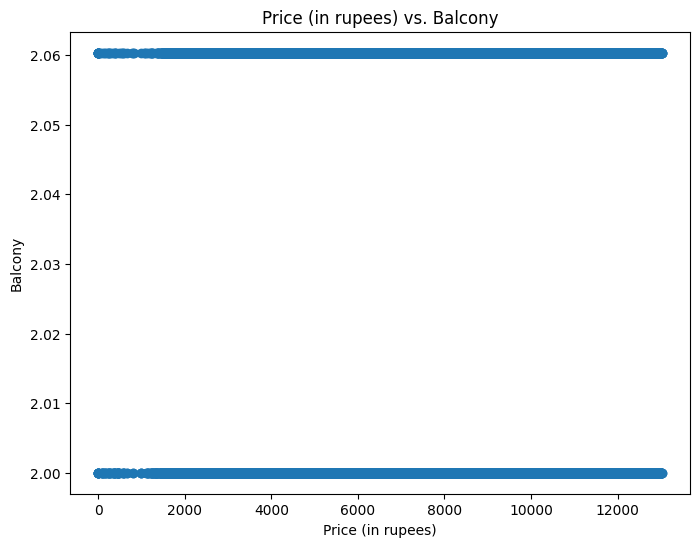

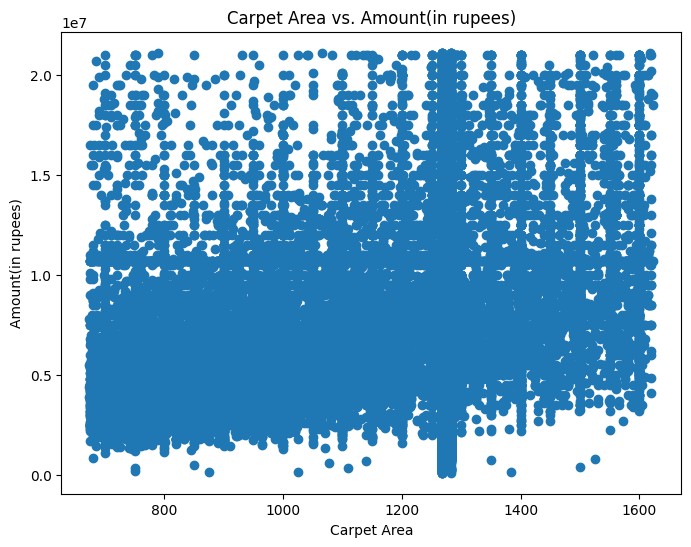

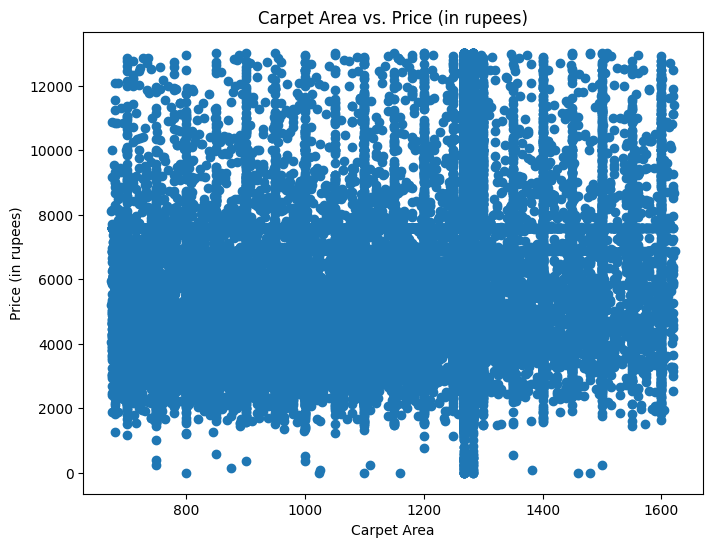

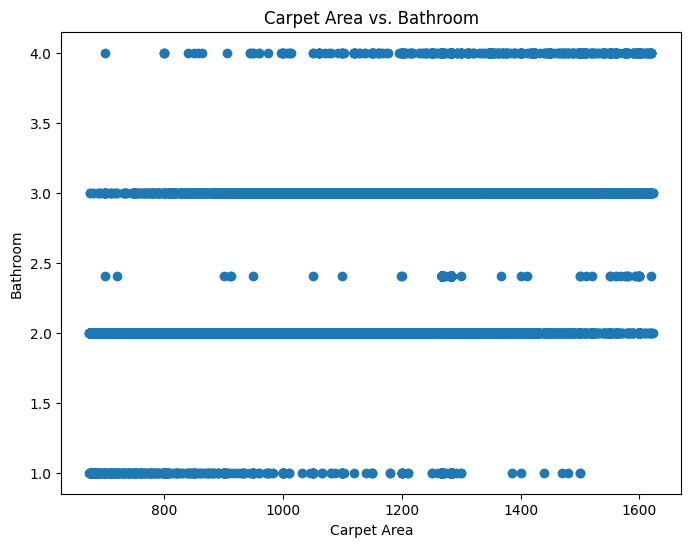

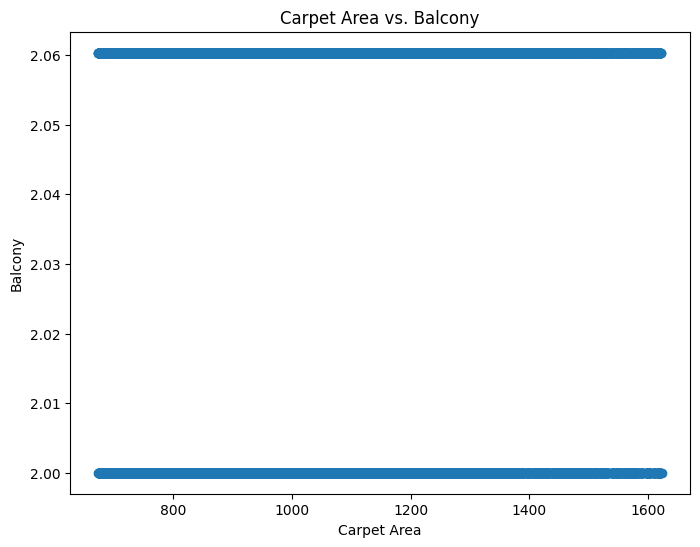

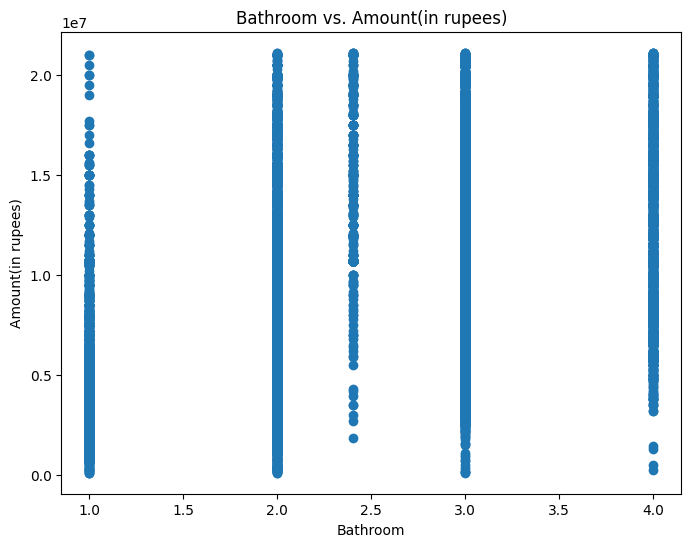

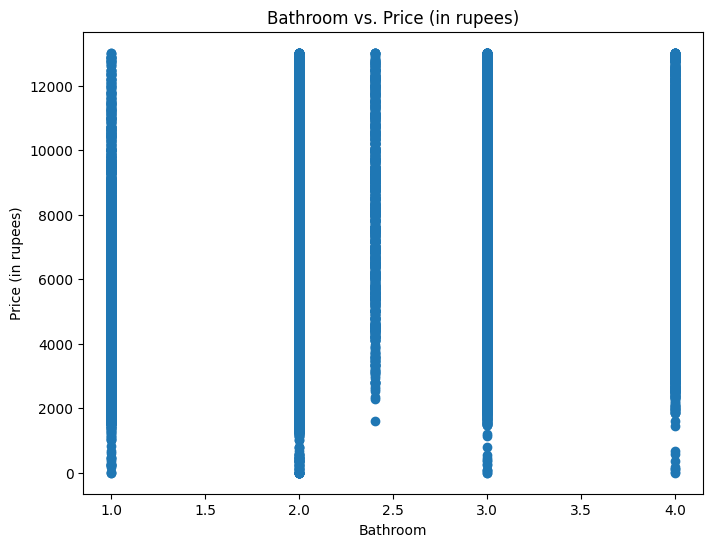

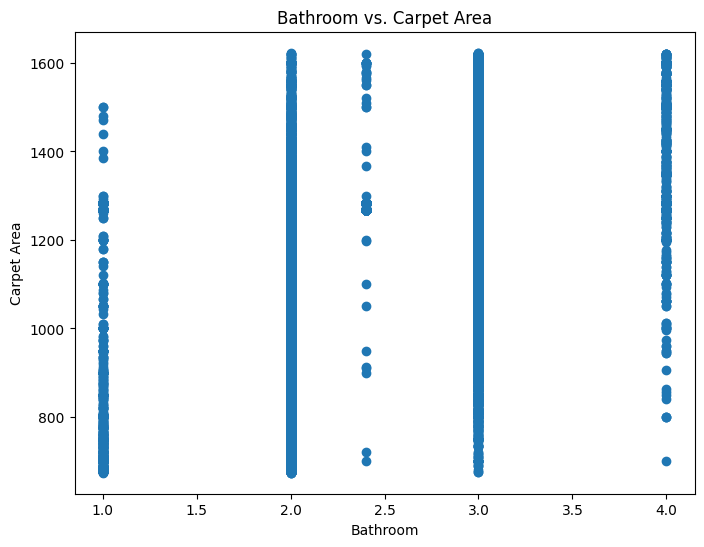

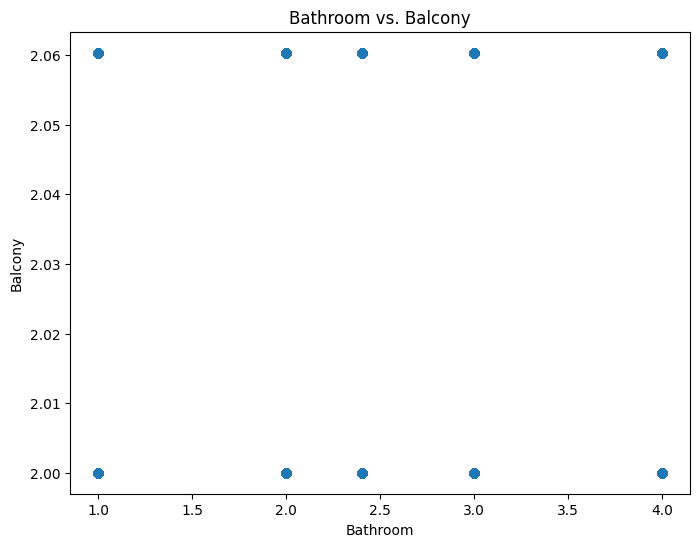

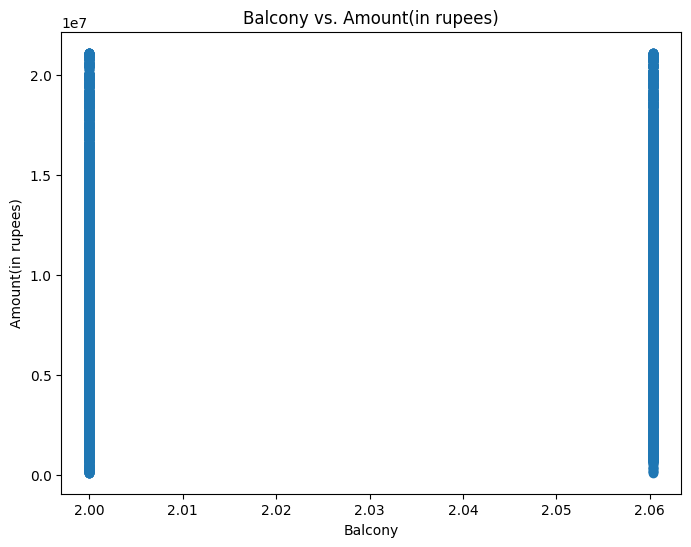

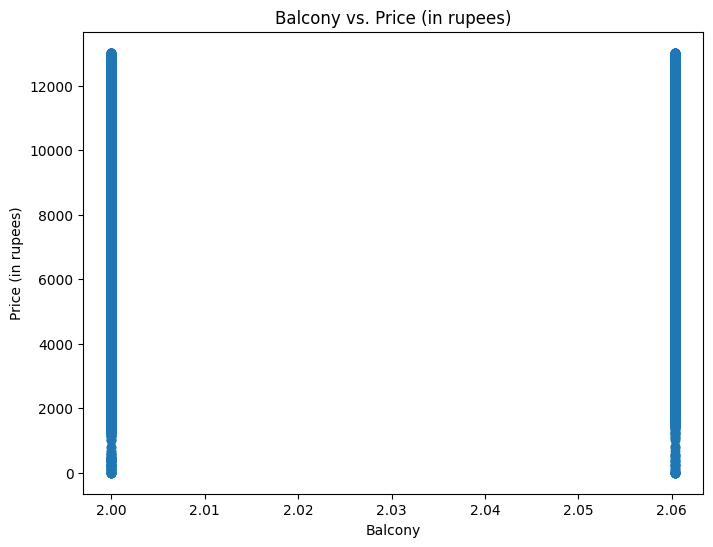

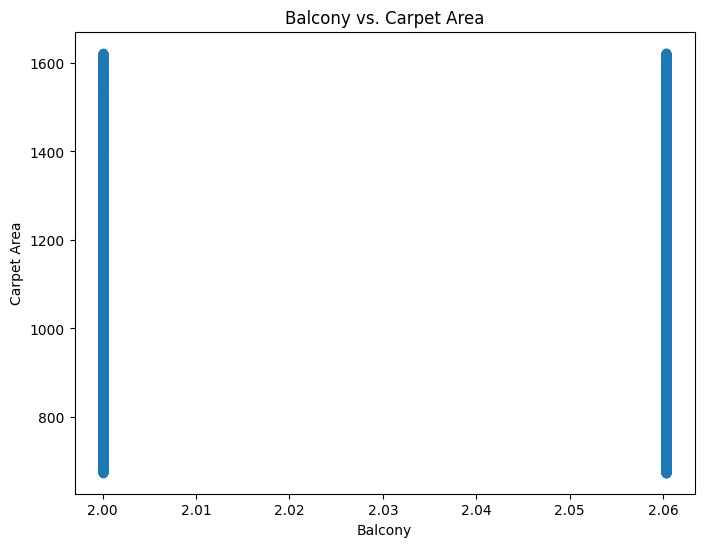

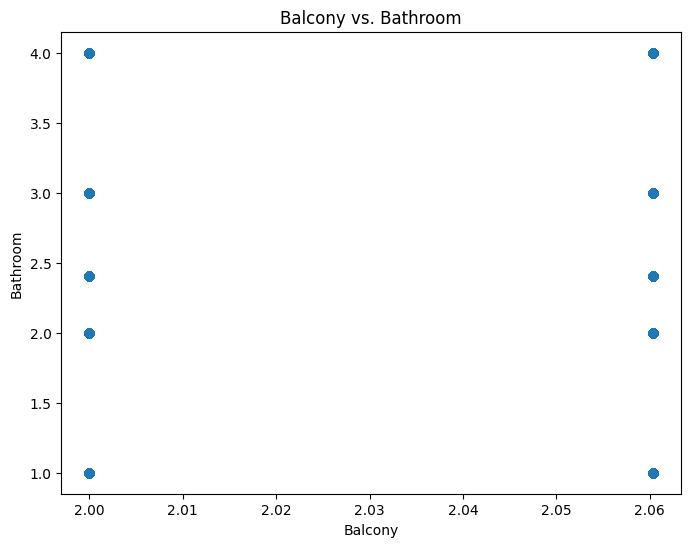

In [ ]:
# Bivariate analysis for numeric vs. numeric variables
numeric_vs_numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(ok_df[column1], ok_df[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

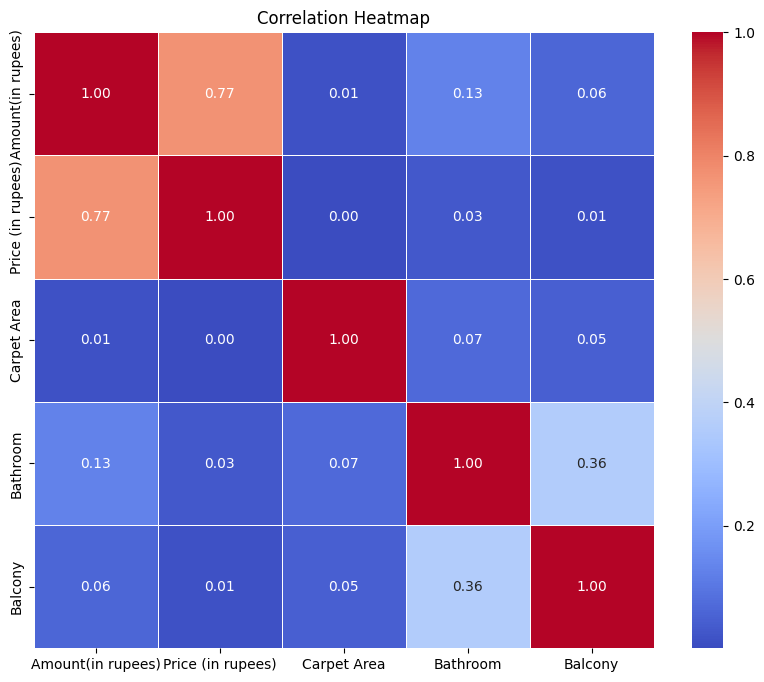

In [ ]:
# correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Feature Engineering**

In [ ]:
ok_df.drop(columns=['Title','Description','Status'],inplace=True)

In [ ]:
ok_df.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,4200000.0,6000.000000,thane,1283.153494,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1.0,2.000000,Unknown
1,9800000.0,6873.847571,thane,1283.153494,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2.0,2.000000,Freehold
2,14000000.0,6873.847571,thane,779.000000,10 out of 29,Resale,Unfurnished,East,Garden/Park,2.0,2.000000,Freehold
3,2500000.0,7583.771885,thane,1283.153494,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1.0,2.060352,Unknown
4,16000000.0,6873.847571,thane,1283.153494,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2.0,2.000000,Co-operative Society


In [ ]:
ok_df.isnull().sum()

Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64

In [ ]:
len(ok_df['location'].unique())

81

In [ ]:
ok_df['location'] = ok_df['location'].apply(lambda x: x.strip())
location_stats = ok_df['location'].value_counts(ascending=False)
location_stats

faridabad        3000
greater-noida    3000
chennai          2998
gurgaon          2998
new-delhi        2998
                 ... 
nellore            30
palakkad           30
solapur            30
pondicherry        30
navsari            30
Name: location, Length: 81, dtype: int64

## **Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(ok_df, columns):
    le = LabelEncoder()
    for column in columns:
        ok_df[column] = le.fit_transform(ok_df[column])
    return ok_df

label_encode_columns = ['location','Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
ok_df = label_encode_multiple(ok_df, label_encode_columns)

In [ ]:
ok_df.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,4200000.0,6000.000000,67,1283.153494,40,3,2,7,19,1.0,2.000000,4
1,9800000.0,6873.847571,67,1283.153494,551,3,1,0,0,2.0,2.000000,1
2,14000000.0,6873.847571,67,779.000000,58,3,2,0,0,2.0,2.000000,1
3,2500000.0,7583.771885,67,1283.153494,24,3,2,7,19,1.0,2.060352,4
4,16000000.0,6873.847571,67,1283.153494,381,3,2,8,1,2.0,2.000000,0


## **Standard Scaling**

In [ ]:
final_df = ok_df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(final_df)
final_df = pd.DataFrame(df_standardized, columns=final_df.columns)

In [ ]:
X = final_df.drop(columns=['Amount(in rupees)'])
y = final_df['Amount(in rupees)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'Support Vector Machine': SVR(C=10, kernel ='linear'),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

In [ ]:
# Random Forest has the highest R-squared value and least errors. Thus random forest is THE model for our dataset.

## **Exporting Modules**

In [ ]:
final_model = RandomForestRegressor(random_state=42)
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(final_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
locations = {
    'locations' : df['location'].unique().tolist()
}
with open("locations.json","w") as f:
  f.write(json.dumps(locations))